In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import nltk
import torch

In [2]:
# Read in data
df = pd.read_csv('/content/playstorescrapping.csv')
print(df.shape)


(45372, 3)


In [3]:
df['id'] = df.index

In [4]:
df.head()

,content,score,at,id
0,"Nonostante tutto gli aggiornamenti, il feed è ...",5,2022-08-21 17:17:36,0
1,"Picche non va da 2 settimane,schermata bianca ...",1,2022-08-21 13:22:00,1
2,È una bellissima app,5,2022-08-21 13:04:02,2
3,"Salve, non riesco a fare un reel, si carica so...",3,2022-08-21 12:54:25,3
4,Un Apo molto popolare....complimenti!!!,5,2022-08-21 12:24:19,4


In [43]:
df.to_csv('insta.csv')

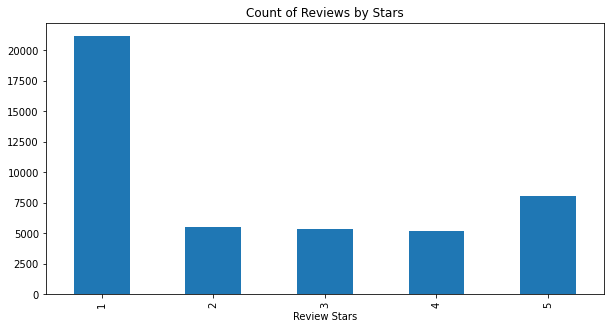

In [5]:
#reviews by stars
ax = df['score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [6]:
example = df['content'][50]
print(example)

Non riesco a caricare nè storie nè post, l'app va in continuo crash. Ho provato ad eliminare la cache, a riavviare il cellulare, ad aggiornare il sistema e a reinstallare l'applicazione. Nulla ha funzionato.


In [9]:
#installing feel_it https://huggingface.co/MilaNLProc/feel-it-italian-sentiment
!pip install feel_it

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 5.0 MB/s 
     |████████████████████████████████| 880 kB 78.1 MB/s 
     |████████████████████████████████| 3.3 MB 74.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=74e8d9859d632be35e6ea4b38e81dae7f08028bae66d5b67e77ba983ac9c7737
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [11]:
#import of SentimentClassifier
from feel_it import SentimentClassifier
model=SentimentClassifier()

Downloading:   0%|          | 0.00/847 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [14]:
#creating a new column
df["sentiment"] = model.predict(list(df["content"]),batch_size=256)
df

,content,score,at,id,sentiment
0,"Nonostante tutto gli aggiornamenti, il feed è ...",5,2022-08-21 17:17:36,0,negative
1,"Picche non va da 2 settimane,schermata bianca ...",1,2022-08-21 13:22:00,1,negative
2,È una bellissima app,5,2022-08-21 13:04:02,2,positive
3,"Salve, non riesco a fare un reel, si carica so...",3,2022-08-21 12:54:25,3,negative
4,Un Apo molto popolare....complimenti!!!,5,2022-08-21 12:24:19,4,positive
...,...,...,...,...,...
45367,Non ho più la possibilità di inserire le doman...,2,2018-09-12 09:22:13,45367,negative
45368,Per le esigenze di fotografo base ottima,5,2018-09-12 08:33:30,45368,positive
45369,Non mi pubblica le storie si incastra e non ca...,1,2018-09-12 08:17:10,45369,negative
45370,"Ho un Huawei p10, aggiorno l'app ma non ho ne ...",1,2018-09-12 07:21:51,45370,negative


In [15]:
positive=df[df["sentiment"] == 'positive']
negative=df[df["sentiment"] == 'negative']

In [16]:
#comparing number of positive and negative comments
df_res = df[["sentiment", "id"]].groupby("sentiment").count().reset_index().rename(columns={"id": "count"}).sort_values("count", ascending=False)
df_res

,sentiment,count
0,negative,34646
1,positive,10726


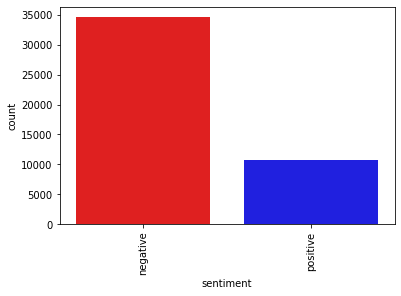

In [24]:
color=['red','blue']
sns.set_palette(color)
sns.barplot(x="sentiment", y="count", data=df_res)
plt.xticks(rotation = 90)
plt.show()

In [33]:
parole_pos = " ".join(df[df["sentiment"] == 'positive']['content'])

In [34]:
parole_neg=" ".join(df[df["sentiment"] == 'negative']['content'])

In [25]:
#removing some words and symbols
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('italian'))

['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal', 'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla', 'dalle', 'di', 'del', 'dello', 'dei', 'degli', 'dell', 'degl', 'della', 'delle', 'in', 'nel', 'nello', 'nei', 'negli', 'nell', 'negl', 'nella', 'nelle', 'su', 'sul', 'sullo', 'sui', 'sugli', 'sull', 'sugl', 'sulla', 'sulle', 'per', 'tra', 'contro', 'io', 'tu', 'lui', 'lei', 'noi', 'voi', 'loro', 'mio', 'mia', 'miei', 'mie', 'tuo', 'tua', 'tuoi', 'tue', 'suo', 'sua', 'suoi', 'sue', 'nostro', 'nostra', 'nostri', 'nostre', 'vostro', 'vostra', 'vostri', 'vostre', 'mi', 'ti', 'ci', 'vi', 'lo', 'la', 'li', 'le', 'gli', 'ne', 'il', 'un', 'uno', 'una', 'ma', 'ed', 'se', 'perché', 'anche', 'come', 'dov', 'dove', 'che', 'chi', 'cui', 'non', 'più', 'quale', 'quanto', 'quanti', 'quanta', 'quante', 'quello', 'quelli', 'quella', 'quelle', 'questo', 'questi', 'questa', 'queste', 'si', 'tutto', 'tutti', 'a', 'c', 'e', 'i', 'l', 'o', 'ho', 'hai', 'ha', 'ab

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
import re
parole_pos,parole_neg = re.sub(r'https?:\/\/.*\/\w*', '', parole_pos),re.sub(r'https?:\/\/.*\/\w*', '', parole_neg)

parole_pos,parole_neg = re.sub(r'instagram', '', parole_pos),re.sub(r'instagram', '', parole_neg)
parole_pos,parole_neg = re.sub(r'Instagram', '', parole_pos),re.sub(r'Instagram', '', parole_neg)
parole_pos ,parole_neg= re.sub(r'app', '', parole_pos),re.sub(r'app', '', parole_neg)
parole_pos ,parole_neg= re.sub(r'fa', '', parole_pos),re.sub(r'fa', '', parole_neg)

parole_pos,parole_neg = re.sub(r'#', '', parole_pos),re.sub(r'#', '', parole_neg)
parole_pos,parole_neg = re.sub(r'@', '', parole_pos),re.sub(r'@', '', parole_neg)


In [40]:
#worldcloud for positive and negative comments
nltk.download('punkt')
from nltk.tokenize import word_tokenize

word_tokens_neg = word_tokenize(parole_neg)
word_tokens_pos = word_tokenize(parole_pos)
stop_words = set(stopwords.words('italian'))

filtered_sentence_pos = [w for w in word_tokens_pos if not w.lower() in stop_words]
filtered_sentence_neg = [w for w in word_tokens_neg if not w.lower() in stop_words]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


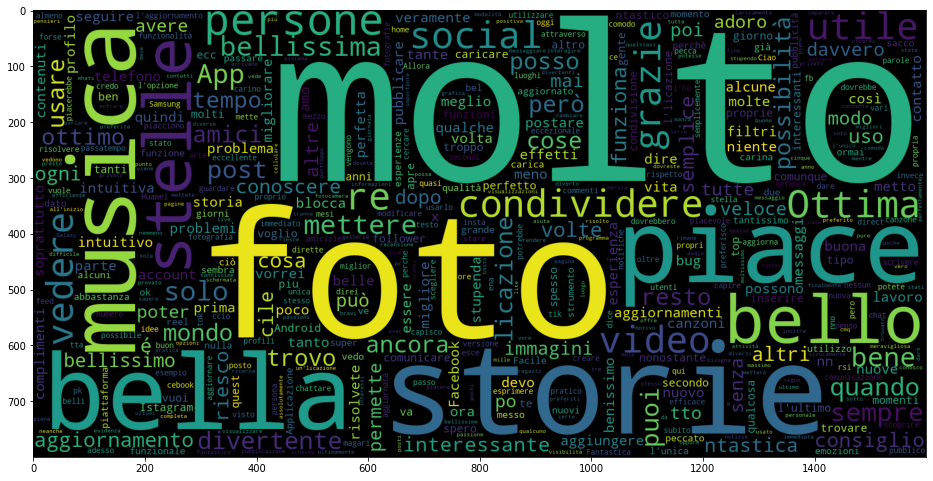

In [41]:
#most used words in positive comments
from wordcloud import WordCloud
plt.figure(figsize = (16,16))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800, collocations=False).generate(" ".join(filtered_sentence_pos))
plt.imshow(wc)

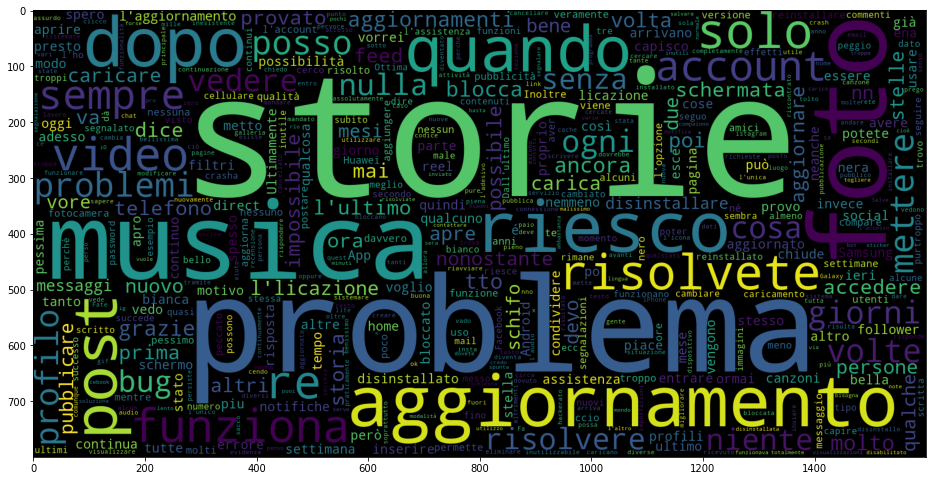

In [42]:
#most used words in negative comments
from wordcloud import WordCloud
plt.figure(figsize = (16,16))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800, collocations=False).generate(" ".join(filtered_sentence_neg))
plt.imshow(wc)